In [2]:
import os
notebook_path = os.path.abspath("data science.ipynb")
listing = os.path.join(os.path.dirname(notebook_path), "listings.csv")

In [3]:
import pandas as pd
df = pd.read_csv(listing)

# Q1


In [4]:
topareas = df.groupby(['neighbourhood'])['calculated_host_listings_count'].count().nlargest(10).reset_index(name='top10')

In [5]:
print ('Top 10 areas with highest number of listings: ')
print(topareas)

Top 10 areas with highest number of listings: 
  neighbourhood  top10
0       Vadhana   2455
1   Khlong Toei   2376
2   Huai Khwang   1500
3   Ratchathewi   1371
4      Bang Rak   1079
5        Sathon    880
6   Phra Nakhon    802
7  Phra Khanong    696
8    Chatu Chak    632
9     Din Daeng    576


# Q2


In [7]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

In [8]:
grouped = df.groupby(['neighbourhood', 'room_type'])['room_type'].count()
grouped.to_csv('roomtype.csv')
print(grouped)

neighbourhood    room_type      
Bang Bon         Entire home/apt      4
                 Private room         3
Bang Kapi        Entire home/apt    178
                 Hotel room           3
                 Private room       144
                                   ... 
Wang Thong Lang  Shared room          5
Yan na wa        Entire home/apt    138
                 Hotel room           9
                 Private room        79
                 Shared room          4
Name: room_type, Length: 169, dtype: int64


In [8]:
import csv

In [9]:
with open('roomtype.csv', 'r') as f, open('private.csv', 'w') as f_out:
    reader = csv.DictReader(f)
    writer = csv.DictWriter(f_out, fieldnames=reader.fieldnames)
    writer.writeheader()  
    for row in reader:
        if row['room_type'] == "Private room":
            writer.writerow(row)

In [10]:
with open('roomtype.csv', 'r') as f, open('entire_home.csv', 'w') as f_out:
    reader = csv.DictReader(f)
    writer = csv.DictWriter(f_out, fieldnames=reader.fieldnames)
    writer.writeheader()  
    for row in reader:
        if row['room_type'] == "Entire home/apt":
            writer.writerow(row)

In [11]:
with open("private.csv", "r") as source:
    reader = csv.reader(source)
      
    with open("PRIVATE.csv", "w") as result:
        writer = csv.writer(result)
        for r in reader:
            writer.writerow((r[0], r[2]))

In [12]:
with open("entire_home.csv", "r") as source:
    reader = csv.reader(source)
      
    with open("ENTIRE_HOME.csv", "w") as result:
        writer = csv.writer(result)
        for r in reader:
            writer.writerow((r[0], r[2]))

In [13]:
private = pd.read_csv("PRIVATE.csv")
private.head()

,neighbourhood,count
0,Bang Bon,3
1,Bang Kapi,144
2,Bang Khae,58
3,Bang Khen,82
4,Bang Kho laen,52


In [14]:
map_df = gpd.read_file("neighbourhoods.geojson")
map_df.head()


,neighbourhood,neighbourhood_group,geometry
0,Bang Phlat,None,"MULTIPOLYGON (((100.51649 13.80034, 100.51622 ..."
1,Huai Khwang,None,"MULTIPOLYGON (((100.58853 13.80282, 100.58852 ..."
2,Wang Thong Lang,None,"MULTIPOLYGON (((100.61295 13.79495, 100.61306 ..."
3,Thawi Watthana,None,"MULTIPOLYGON (((100.39673 13.80187, 100.39802 ..."
4,Lat Krabang,None,"MULTIPOLYGON (((100.79514 13.79399, 100.79516 ..."


In [15]:
pop_states = map_df.merge(private, left_on="neighbourhood", right_on="neighbourhood")
pop_states.head()

,neighbourhood,neighbourhood_group,geometry,count
0,Bang Phlat,None,"MULTIPOLYGON (((100.51649 13.80034, 100.51622 ...",108
1,Huai Khwang,None,"MULTIPOLYGON (((100.58853 13.80282, 100.58852 ...",391
2,Wang Thong Lang,None,"MULTIPOLYGON (((100.61295 13.79495, 100.61306 ...",74
3,Thawi Watthana,None,"MULTIPOLYGON (((100.39673 13.80187, 100.39802 ...",7
4,Lat Krabang,None,"MULTIPOLYGON (((100.79514 13.79399, 100.79516 ...",118


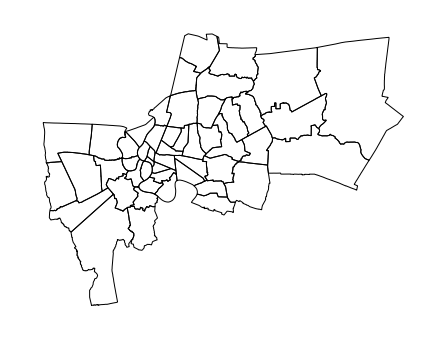

In [27]:

gplt.polyplot(
  pop_states,
  
)



# Q3


In [24]:
tophosts = df.groupby(['host_name'])['calculated_host_listings_count'].sum().nlargest(10).reset_index(name='top10')
print ('Top 10 hosts with highest number of listings: ')
print(tophosts)

Top 10 hosts with highest number of listings: 
       host_name  top10
0          Curry  31329
1            Rfh  14641
2        Gravity   6241
3          Nicha   5933
4  ISanook Hotel   5184
5          Noons   4489
6          Magic   3969
7       Pornchai   3945
8        Dusadee   3844
9              K   3724


# Q4


In [26]:
meanprice = df.groupby(['neighbourhood'])['price'].mean().reset_index(name='mean_price')
print ('Mean price of stay in respective neighbourhoods : ')
print(meanprice)

Mean price of stay in respective neighbourhoods : 
           neighbourhood   mean_price
0               Bang Bon  1558.571429
1              Bang Kapi  1220.843373
2              Bang Khae  3831.281553
3              Bang Khen  1244.000000
4          Bang Kho laen  1723.285714
5        Bang Khun thain  4006.285714
6                Bang Na  1602.631304
7             Bang Phlat  1553.647059
8               Bang Rak  2693.925857
9               Bang Sue  1345.280702
10           Bangkok Noi  1893.536723
11           Bangkok Yai  1722.617647
12             Bueng Kum  1955.015385
13            Chatu Chak  1626.865506
14            Chom Thong  1740.741935
15             Din Daeng  2146.164931
16            Don Mueang  1147.409524
17                 Dusit  3162.341880
18           Huai Khwang  1843.764667
19           Khan Na Yao  2074.188406
20         Khlong Sam Wa  1835.046512
21            Khlong San  2262.819838
22           Khlong Toei  2507.895202
23                Lak Si  1219.483221